対応のないT検定

In [1]:
import pandas as pd
df = pd.read_csv("iris.csv")
df0 = df[df["category"]==0]
df1 = df[df["category"]==1]
df2 = df[df["category"]==2]

In [5]:
df.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width', 'category'],
      dtype='object')

In [7]:
import scipy.stats as stats
import scipy as sp

In [11]:
print("カテゴリ0とカテゴリ1の比較")
for col in df.columns:
    x0 = df0[col].values
    x1 = df1[col].values
    t, p = stats.ttest_ind(x0, x1, equal_var=True)
    MU = abs(x0.mean() - x1.mean())
    SE = MU / t
    DF = len(x0) - 1 + len(x1) - 1
    CI = stats.t.interval(alpha=0.95, loc=MU, scale=SE, df=DF)
    print("項目名:"+col)
    print("p値:"+str(p))
    print("平均値の差:"+str(MU))
    print("差の標準偏差"+str(SE))
    print()

カテゴリ0とカテゴリ1の比較
項目名:sepal length in cm
p値:8.985235037487077e-18
平均値の差:0.9299999999999997
差の標準偏差-0.08839475466938762

項目名:sepal width in cm
p値:1.8452599454769322e-15
平均値の差:0.6579999999999995
差の標準偏差0.0695929858065408

項目名:petal length in cm
p値:5.404910513441677e-62
平均値の差:2.7979999999999996
差の標準偏差-0.07084850177725449

項目名:petal width
p値:3.831095388248162e-56
平均値の差:1.0799999999999998
差の標準偏差-0.031689823255410934

項目名:category
p値:0.0
平均値の差:1.0
差の標準偏差-0.0



In [21]:
print("カテゴリ1とカテゴリ2の比較")
for col in df.columns:
    x1 = df1[col].values
    x2 = df2[col].values
    t, p=stats.ttest_ind(x1, x2, equal_var=True)
    MU = abs(x1.mean()-x2.mean())
    SE = MU / t
    DF = len(x1) - 1 + len(x2) - 1
    CI = stats.t.interval(alpha=0.95, loc=MU, scale=SE, df=DF)
    print("項目名:"+col)
    print("p値:"+str(p))
    print("平均値の差:"+str(MU))
    print("差の標準偏差"+str(SE))
    print()

カテゴリ1とカテゴリ2の比較
項目名:sepal length in cm
p値:1.7248563024547942e-07
平均値の差:0.6519999999999984
差の標準偏差-0.11582534353103226

項目名:sepal width in cm
p値:0.0018191004238894803
平均値の差:0.20399999999999974
差の標準偏差-0.06363544128671618

項目名:petal length in cm
p値:3.1788195478061495e-22
平均値の差:1.2920000000000007
差の標準偏差-0.10250893440404629

項目名:petal width
p値:2.2304090710248333e-26
平均値の差:0.7000000000000004
差の標準偏差-0.047862046657075594

項目名:category
p値:0.0
平均値の差:1.0
差の標準偏差-0.0



C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [22]:
print("カテゴリ2とカテゴリ0の比較")
for col in df.columns:
    x2 = df2[col].values
    x0 = df0[col].values
    t, p = stats.ttest_ind(x2, x0, equal_var=True)
    MU = abs(x2.mean()-x0.mean())
    SE = MU / t
    DF = len(x2) - 1 + len(x0) - 1
    CI = stats.t.interval(alpha=0.95, loc=MU, scale=SE, df=DF)
    print("項目名:"+col)
    print("p値:"+str(p))
    print("平均値の差:"+str(MU))
    print("差の標準偏差"+str(SE))
    print()

カテゴリ2とカテゴリ0の比較
項目名:sepal length in cm
p値:6.892546060674059e-28
平均値の差:1.581999999999998
差の標準偏差0.10281943753344443

項目名:sepal width in cm
p値:4.24635538184499e-09
平均値の差:0.45399999999999974
差の標準偏差-0.07038378755807626

項目名:petal length in cm
p値:1.5048006992427275e-71
平均値の差:4.09
差の標準偏差0.08182260552873029

項目名:petal width
p値:3.2303748184318025e-65
平均値の差:1.7800000000000002
差の標準偏差0.04160259018623818

項目名:category
p値:0.0
平均値の差:2.0
差の標準偏差0.0



In [18]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
y_name = "category"
y_table = df[y_name]
y = y_table.values
x_table = df.drop(y_name,axis=1)
x_name = x_table.columns
x = x_table.values

In [20]:
model = GBC()
model.fit(x, y)
imp = []
imp.append(model.feature_importances_)
dfi = pd.DataFrame(imp)
dfi.columns = x_name
dfi

,sepal length in cm,sepal width in cm,petal length in cm,petal width
0,0.005908,0.011748,0.323729,0.658616


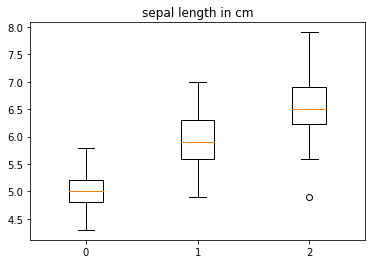

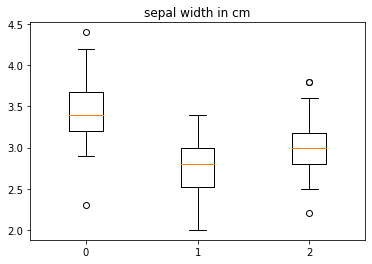

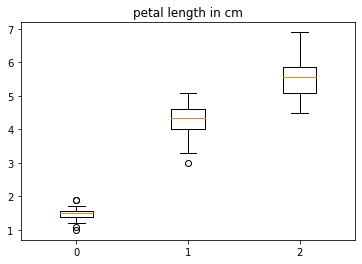

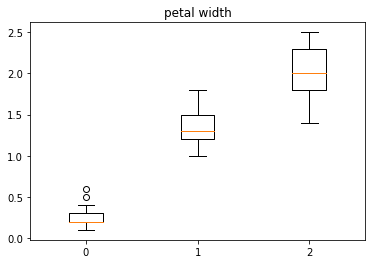

In [29]:
import matplotlib.pyplot as plt
for col in x_table.columns:
    x0 = df0[col].values
    x1 = df1[col].values
    x2 = df2[col].values
    data = (x0, x1, x2)
    plt.boxplot(data, labels=['0', '1', '2'])
    plt.title(col)
    plt.show()

対応のあるT検定

In [30]:
df = pd.read_html("https://bellcurve.jp/statistics/course/9453.html")[1]
df

,被検者No.,投与前の血圧,投与後の血圧,差（投与前-投与後）
0,1,180,150,30
1,2,130,135,-5
2,3,165,145,20
3,4,155,150,5
4,5,140,140,0
5,平均,154,144,10


In [31]:
df.columns

Index(['被検者No.', '投与前の血圧', '投与後の血圧', '差（投与前-投与後）'], dtype='object')

In [32]:
xb = df['投与前の血圧'].values[0: -1]
xa = df['投与後の血圧'].values[0: -1]
print(xb)
print(xa)

[180 130 165 155 140]
[150 135 145 150 140]


In [35]:
result = stats.ttest_rel(xb, xa)
print(result.pvalue)
print(result)

0.1998291855377201
Ttest_relResult(statistic=1.5339299776947408, pvalue=0.1998291855377201)


In [34]:
df.to_csv("血圧.csv", encoding="shift-jis", index=False)

In [48]:
df = pd.read_csv("golf.csv",encoding="utf-8")
df

,天気,気温,湿度,風,ゴルフ
0,晴,29,85,弱,0
1,晴,27,90,強,0
2,曇,28,78,弱,1
3,雨,21,96,弱,1
4,雨,20,80,弱,1
5,雨,18,70,強,0
6,曇,18,65,強,1
7,晴,22,95,弱,0
8,晴,21,70,弱,1
9,雨,24,80,弱,1


In [49]:
cross = pd.crosstab(df.ゴルフ, [df.天気, df.風])
cross

天気   晴     曇     雨   
風    弱  強  弱  強  弱  強
ゴルフ                  
0    2  1  0  0  0  2
1    1  1  2  2  3  0

In [50]:
x2, p, dof, expected = sp.stats.chi2_contingency(cross)

In [51]:
print(p)

0.11235865025855099


In [53]:
dfe = pd.DataFrame(expected)
dfe.columns = cross.columns
dfe

天気         晴                   曇                   雨          
風          弱         強         弱         強         弱         強
0   1.071429  0.714286  0.714286  0.714286  1.071429  0.714286
1   1.928571  1.285714  1.285714  1.285714  1.928571  1.285714

In [54]:
dof

5

In [55]:
dataana = cross - expected

In [57]:
dfa = pd.DataFrame(dataana)
dfa.columns = cross.columns
dfa

天気          晴                   曇                   雨          
風           弱         強         弱         強         弱         強
ゴルフ                                                            
0    0.928571  0.285714 -0.714286 -0.714286 -1.071429  1.285714
1   -0.928571 -0.285714  0.714286  0.714286  1.071429 -1.285714